# Summary
In this notebook we explore the data and look at various tables and graphs. Some key results we find are
* __Lithuania has shown the highest suicide rates,__ especially among males, with about 90 suicides per 100,000 men in the 90s
* The highest females suicide rates are found in Hungary (about 30 per 100,000 people, mostly in the 80s)
* In more recent years, Lithuania still had the highest rate, followed by Korea and Suriname
* Old people (75+) have higher suicide rates compared to young people (35-34 or 35-54 year olds)
* Guatemala, Peru and Jamaica show some of the lowest suicide rates
* In recent years, Malaysia, Egypt, Oman and Morocco were amongst the countries with lowest suicide rates

# The data

This notebook uses suicide statistics data from WHO (see the readme for more information), providing number of suicides and population sizes split by age ranges and gender, spanning the years 1985-2014 (2015 and 2016 are also included but a lot of data is missing so I mostly left out these two years). Extra population data, also from WHO, was used to fill in some of the missing values in the suicide dataset. 

In [1]:
INPUT_FILE = '../data/processed/enriched_df.csv'
META_DATA = '../data/processed/cleaned_meta.csv'
CHOROPLETH_DATA_FILE = '../data/processed/choropleth_df.csv'
RAW = '../data/raw/who_suicide_statistics.csv'

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from ipywidgets import interact
import ipywidgets as widgets

In [3]:
%load_ext autoreload
%autoreload 2

# Read in data

In [4]:
df_with_age = pd.read_csv(INPUT_FILE)

In [5]:
df_with_age.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [6]:
df = pd.read_csv(CHOROPLETH_DATA_FILE)
df.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Barbados,0.0,119800.0,0.00,BRB
3,1979,female,Belgium,755.0,4739700.0,15.93,BEL
4,1979,female,Brazil,1074.0,51202700.0,2.10,BRA


In [9]:
df.sort_values(by="suicides per 100,000", ascending=False).head(5)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
2275,1994,male,Lithuania,1438.0,1594020.0,90.21,LTU
2633,1996,male,Lithuania,1388.0,1577778.0,87.97,LTU
2453,1995,male,Lithuania,1388.0,1585526.0,87.54,LTU
3870,2002,male,Lithuania,1309.0,1520461.0,86.09,LTU
2821,1997,male,Lithuania,1348.0,1570754.0,85.82,LTU


# Tables with highest and lowest suicide rates

Here we aggregate our statistics over all age groups, to get an idea of the total suicide rate per country. We'll look at male, female, and combined suicide rates and sort them across our entire dataset (from 1985 to 2014) as well as just in 2014 to look at more recent statistics

In [11]:
# create data sets with overall suicides rates, as well as tables just for males and females.
both = df.groupby(['year', 'country']).agg(population = pd.NamedAgg(column="population", aggfunc=sum), 
                                                 suicides_no = pd.NamedAgg(column="suicides_no", aggfunc=sum), 
                                                 code = pd.NamedAgg(column="code", aggfunc=lambda x: x[0]),
                                                ).reset_index()
females = df[df["sex"] == "female"]
males = df[df["sex"] == "male"]
both.loc[both["population"] == 0, "population"] = np.nan
both["suicides per 100,000"] = both['suicides_no'] / both['population'] * 100000 

## Highest suicide rates overall
It seems that Lithuania was not a very nice place to live in the 90s!! Mainly as a male though, the female Lithuanians are not as suicidal, unlike the Hungarian women.

In [12]:
males.sort_values(by="suicides per 100,000", ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
2275,1994,male,Lithuania,1438.0,1594020.0,90.21,LTU
2633,1996,male,Lithuania,1388.0,1577778.0,87.97,LTU
2453,1995,male,Lithuania,1388.0,1585526.0,87.54,LTU
3870,2002,male,Lithuania,1309.0,1520461.0,86.09,LTU
2821,1997,male,Lithuania,1348.0,1570754.0,85.82,LTU
3422,2000,male,Lithuania,1317.0,1542706.0,85.37,LTU
3211,1999,male,Lithuania,1285.0,1552914.0,82.75,LTU
3012,1998,male,Lithuania,1285.0,1562853.0,82.22,LTU
3647,2001,male,Lithuania,1255.0,1531211.0,81.96,LTU
2106,1993,male,Lithuania,1287.0,1602155.0,80.33,LTU


We'll probably ignore the statistics for Monaco here, as it's such a small country -- the 6 suicides that year may have just been a fluctuation

In [13]:
females.sort_values(by="suicides per 100,000", ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
871,1986,female,Monaco,6.0,1.473025e+04,40.73,MCO
206,1981,female,Hungary,1586.0,5.134500e+06,30.89,HUN
14,1979,female,Hungary,1464.0,5.084900e+06,28.79,HUN
94,1980,female,Hungary,1462.0,5.112100e+06,28.60,HUN
466,1983,female,Hungary,1455.0,5.167900e+06,28.15,HUN
340,1982,female,Hungary,1442.0,5.153600e+06,27.98,HUN
855,1986,female,Hungary,1424.0,5.186000e+06,27.46,HUN
491,1983,female,Sri Lanka,1807.0,6.616000e+06,27.31,LKA
601,1984,female,Sri Lanka,1829.0,6.696000e+06,27.31,LKA
577,1984,female,Hungary,1414.0,5.178500e+06,27.31,HUN


Looking at overall rates, Lithuania and Hungary are the clear winners (losers?)

In [14]:
both.sort_values(by="suicides per 100,000", ascending=False).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
1295,1996,Lithuania,3375163.0,1722.0,LTU,51.019758
1207,1995,Lithuania,3387149.0,1694.0,LTU,50.012562
1119,1994,Lithuania,3400730.0,1700.0,LTU,49.989267
244,1983,Hungary,9969100.0,4906.0,HUN,49.212065
1685,2000,Lithuania,3315125.0,1631.0,LTU,49.198748
116,1981,Hungary,9908700.0,4871.0,HUN,49.158820
301,1984,Hungary,9986500.0,4900.0,HUN,49.066239
58,1980,Hungary,9866500.0,4797.0,HUN,48.619065
1388,1997,Lithuania,3364273.0,1632.0,LTU,48.509737
14,1979,Hungary,9828100.0,4767.0,HUN,48.503780


## Highest suicide rates in 2014

In [15]:
# overall rates (males and females combined)
both.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
3203,2014,Lithuania,2781577.0,930.0,LTU,33.434271
3223,2014,Republic of Korea,48465917.0,13834.0,PRK,28.543770
3238,2014,Suriname,497701.0,128.0,SUR,25.718253
3192,2014,Hungary,9412788.0,1925.0,HUN,20.450901
3198,2014,Japan,120274000.0,24357.0,JPN,20.251260
3199,2014,Kazakhstan,15428844.0,3119.0,KAZ,20.215384
3202,2014,Latvia,1894041.0,382.0,LVA,20.168518
3235,2014,Slovenia,1951786.0,388.0,SVN,19.879229
3228,2014,Russian Federation,134713962.0,26541.0,RUS,19.701744
3245,2014,Ukraine,40464165.0,7968.0,UKR,19.691497


In [16]:
# suicide rates for males
males.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
6453,2014,male,Lithuania,769.0,1273877.0,60.37,LTU
6473,2014,male,Republic of Korea,9735.0,24194012.0,40.24,PRK
6488,2014,male,Suriname,92.0,249232.0,36.91,SUR
6452,2014,male,Latvia,311.0,862754.0,36.05,LVA
6411,2014,male,Belarus,1465.0,4112945.0,35.62,BLR
6478,2014,male,Russian Federation,21886.0,61936914.0,35.34,RUS
6449,2014,male,Kazakhstan,2556.0,7393150.0,34.57,KAZ
6495,2014,male,Ukraine,6412.0,18595916.0,34.48,UKR
6485,2014,male,Slovenia,325.0,964842.0,33.68,SVN
6431,2014,male,Estonia,193.0,577352.0,33.43,EST


In [17]:
# suicide rates for females
females.sort_values(by=["year", "suicides per 100,000"], ascending=False).head(10)

,year,sex,country,suicides_no,population,"suicides per 100,000",code
6377,2014,female,Republic of Korea,4099.0,24271905.0,16.89,PRK
6392,2014,female,Suriname,36.0,248469.0,14.49,SUR
6352,2014,female,Japan,7537.0,61879000.0,12.18,JPN
6357,2014,female,Lithuania,161.0,1507700.0,10.68,LTU
6316,2014,female,Belgium,561.0,5389207.0,10.41,BEL
6380,2014,female,Rodrigues,2.0,19420.0,10.30,MUS
6345,2014,female,Hong Kong SAR,363.0,3756900.0,9.66,CHN
6346,2014,female,Hungary,447.0,4946198.0,9.04,HUN
6326,2014,female,Croatia,186.0,2091949.0,8.89,HRV
6393,2014,female,Sweden,363.0,4570064.0,7.94,SWE


## Lowest suicide rates in 2014

Here I did not show countries with no reported suicides at all, as they are likely to just be missing or not-well-recorded data (I doubt nobody at all kills themselves in an entire year in a whole country, unless the country is maybe tiny but then it's hard to draw robust conclusions from that anyway).  I also filtered out very small countries

In [18]:
low = both[(both["suicides_no"] > 0) & (both["population"] > 500000)]

low.sort_values(by=["year", "suicides per 100,000"], ascending=[False, True]).head(10)

,year,country,population,suicides_no,code,"suicides per 100,000"
3205,2014,Malaysia,29866559.0,21.0,MYS,0.070313
3179,2014,Egypt,76981540.0,88.0,EGY,0.114313
3215,2014,Oman,3631098.0,7.0,OMN,0.192779
3211,2014,Morocco,34192347.0,118.0,MAR,0.345106
3160,2014,Bahrain,1213966.0,9.0,BHR,0.741372
3236,2014,South Africa,48912129.0,580.0,ZAF,1.185800
3218,2014,Peru,30090359.0,402.0,PER,1.335976
3200,2014,Kuwait,3715284.0,68.0,KWT,1.830277
3156,2014,Armenia,2803029.0,58.0,ARM,2.069190
3242,2014,Turkey,70931420.0,1617.0,TUR,2.279667


# TODO: 
* somewhere, also for further analyses when doing mean and std, I need to filter out at the very least the zeros (e.g. lithuania had a 0 suicide number somewhere which seems missing data), and maybe also the very bad outliers

# Visualizatons
## high suicide-rate countries over the years

Here I picked out countries with overall highest suicide rate in any year, and plotted their rates from 1985 to 2014. We see that Lithuania, Latvia, Russia and Estonia all saw sharp increases in suicides in the early 90s. Why would the suicide rates in Lithuania, Latvia and Estonia increase by so much after they just gained their independence? 


As we'll see later, the highest suicide rates in Lithuania are for middle-aged men. Apparently many middle-aged men drink, and most suicides (in Lithuania) are performed under the influence of alcohol.

The most common way to perform suicide in Lithuania is by hanging, as can be read in the article (Gailiené , __"Suicide in Lithuania During the Years of 1990 to 2002"__, Archives of Suicide Research, 2010)

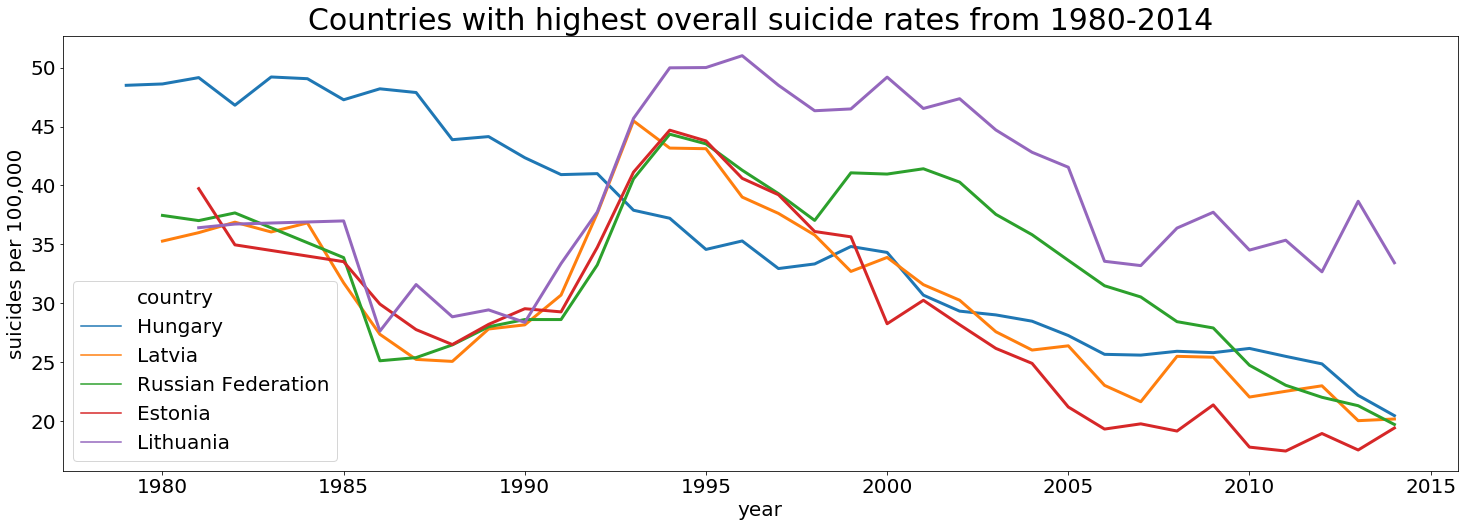

In [44]:
# pick countries with higest overall suicide rate per 100,000 in any year
top_countries_overall = both.sort_values(by="suicides per 100,000", ascending=False).drop_duplicates(subset=["country"], keep='first')
top_countries_overall = top_countries_overall.iloc[:5]["country"]

sample = both.loc[both["country"].isin(top_countries_overall), :]
sample.loc[sample["suicides per 100,000"] == 0, "suicides per 100,000"] = np.nan  # probably missing data

# make plot
fig = plt.figure(figsize=(25,8))
line = sns.lineplot(x="year", y="suicides per 100,000", data=sample, hue="country", lw=3)

line.set_title("Countries with highest overall suicide rates from 1980-2014", fontsize=30)
line.set_xlabel("year", fontsize=20)
line.tick_params(labelsize=20)
line.set_ylabel("suicides per 100,000", fontsize=20)
plt.legend(loc="lower left", prop={"size": 20});
plt.savefig("figures/top_5_highest.png", dpi=400)

## Low-suicide countries over the year

Here we first process the data a bit. We make sure we have a nonzero suicide number (zero suicides in a year in a country seems unlikely, probably just a consequence of incomplete data) and a decent-size population (otherwise anything can be a fluctuation, really). Also, I removed countries with very little data in the dataset (with the 
idea that if many years are missing, the years in which we _do_ have data might be unreliable). I demanded that we have at least 20 years of data (out of our 35 year range). 

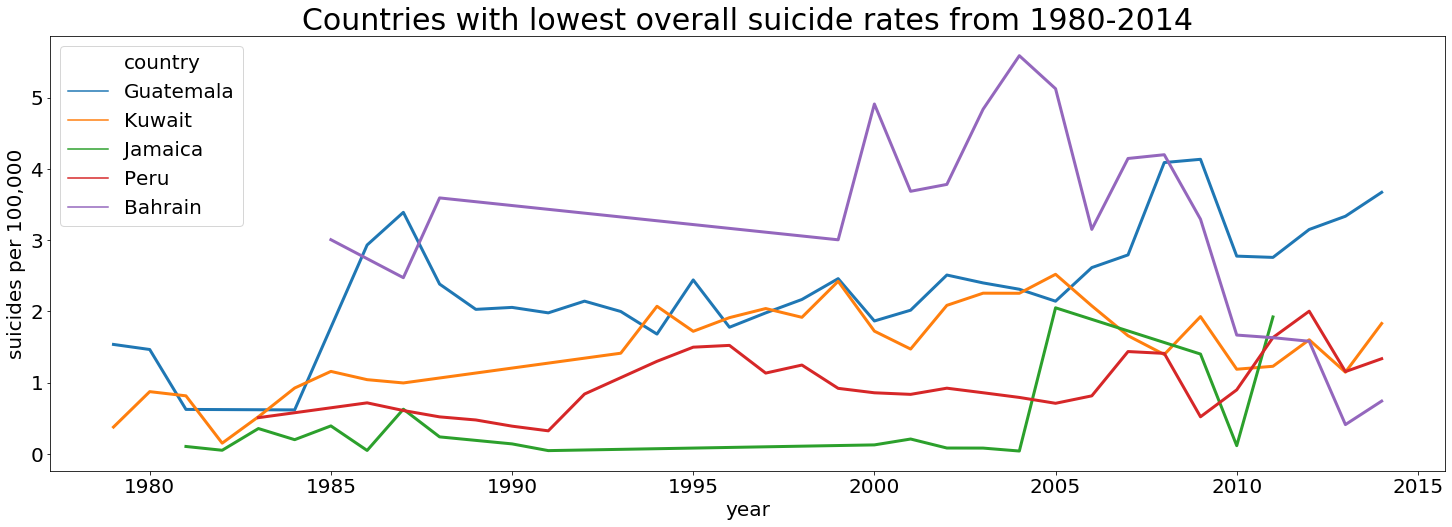

In [45]:
# filter data. Keep only countries with decent population size, and enough data available
lowest_overall = both[(both["suicides_no"] > 0) & (both["population"] > 1000000)]
counts = both.groupby(["country"])['year'].agg(['count'])['count']  # number of rows of data for each country
countries_little_data = list(counts[counts < 20].index)
lowest_overall = lowest_overall[~lowest_overall["country"].isin(countries_little_data)]

# pick out countries with lowest overall suicide rates
lowest_overall = lowest_overall.sort_values(by="suicides per 100,000", ascending=True).drop_duplicates(subset=["country"], keep="first")
lowest_overall = lowest_overall.iloc[:5]["country"]
sample = both.loc[both["country"].isin(lowest_overall), :]

sample.loc[sample["suicides per 100,000"] == 0, "suicides per 100,000"] = np.nan  # probably missing data

# make plot
fig = plt.figure(figsize=(25,8))
line = sns.lineplot(x="year", y="suicides per 100,000", data=sample, hue="country", lw=3)
line.set_title("Countries with lowest overall suicide rates from 1980-2014", fontsize=30)
line.set_xlabel("year", fontsize=20)
line.tick_params(labelsize=20)
line.set_ylabel("suicides per 100,000", fontsize=20)
plt.legend(loc="upper left", prop={"size": 20});
plt.savefig("figures/top_5_lowest.png", dpi=400)

## Age range distribution
Here we'll look at suicide rates for different age groups. The original WHO data came with statistics for 6 age groups. We'll plot the average rates of suicide for each of these groups, for different countries. 

* When looking at data from all countries together, it's the 75+ year olds who commit the most suicides (well, relatively speaking). Life as a 75+ year old can get tough: not only your health may worsen, also your friends and perhaps even partner may start to die. It's no wonder that a relatively high number of old people choose to take fate in their own hands. 

* In Lithuania, however, the 35-54 year old age group (for men) shows highest suicide rates. As mentioned before, this is often under the influence of alcohol. 

* Finally, you can look up statistics for any country you want! Use the interactive plot at the end of this notebook, just pick a country from the dropdown widget. The suicide rates are calculated over the entire dataset, i.e. the average over the years 1980 - 2014 is shown.

In [38]:
df_with_age["suicides per 100,000"] = df_with_age["suicides_no"] / df_with_age["population"] * 100000

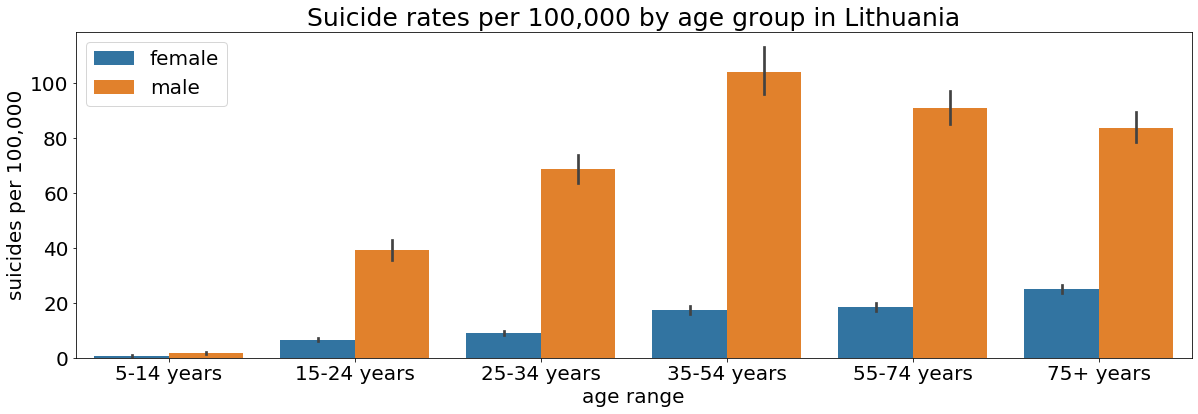

In [46]:
plt.figure(figsize=(20,6))
bar = sns.barplot(x="age", 
            y="suicides per 100,000", 
            hue="sex", 
            data=df_with_age[df_with_age["country"] == "Lithuania"], 
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
bar.set_title("Suicide rates per 100,000 by age group in Lithuania", fontsize=25)
bar.set_xlabel("age range", fontsize=20)
bar.tick_params(labelsize=20)
bar.set_ylabel("suicides per 100,000", fontsize=20)
plt.legend(loc="upper left", prop={"size": 20});
plt.savefig("figures/age_lithuania.png", dpi=400)

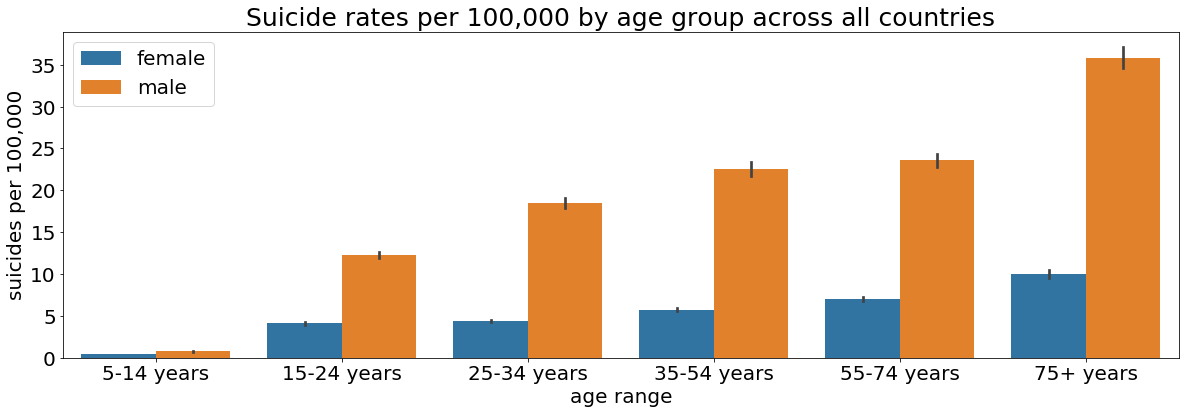

In [47]:
plt.figure(figsize=(20,6))
bar = sns.barplot(x="age", 
            y="suicides per 100,000", 
            hue="sex", 
            data=df_with_age, 
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])

bar.set_title("Suicide rates per 100,000 by age group across all countries", fontsize=25)
bar.set_xlabel("age range", fontsize=20)
bar.tick_params(labelsize=20)
bar.set_ylabel("suicides per 100,000", fontsize=20)
plt.legend(loc="upper left", prop={"size": 20});
plt.savefig("figures/age_overall.png", dpi=400)

In [41]:
countries = df_with_age["country"].value_counts().index.sort_values()

In [42]:
@interact
def bar_plot_ages(country=widgets.Dropdown(options=countries, value="Poland")):
    plt.figure(figsize=(15,5))
    bar = sns.barplot(x="age", 
                y="suicides per 100,000", 
                hue="sex", 
                data=df_with_age[df_with_age["country"] == country], 
                order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])   
    plt.title(f"Suicide rates per 100,000 by age group in {country}", fontsize=25);
    bar.set_xlabel("age range", fontsize=20)
    bar.tick_params(labelsize=20)
    bar.set_ylabel("suicides per 100,000", fontsize=20)
    plt.legend(loc="upper left", prop={"size": 18})

interactive(children=(Dropdown(description='country', index=95, options=('Albania', 'Anguilla', 'Antigua and B…

In [43]:
df_with_age.loc[(df_with_age["country"] == "Netherlands") & (df_with_age["year"] == 2000)]

,country,year,sex,age,suicides_no,population,"suicides per 100,000"
26712,Netherlands,2000,female,15-24 years,18.0,927539.0,1.940619
26713,Netherlands,2000,female,25-34 years,67.0,1212404.0,5.526211
26714,Netherlands,2000,female,35-54 years,221.0,2386392.0,9.260842
26715,Netherlands,2000,female,5-14 years,0.0,962570.0,0.000000
26716,Netherlands,2000,female,55-74 years,146.0,1444755.0,10.105520
26717,Netherlands,2000,female,75+ years,49.0,629463.0,7.784413
26718,Netherlands,2000,male,15-24 years,90.0,960741.0,9.367769
26719,Netherlands,2000,male,25-34 years,162.0,1251135.0,12.948243
26720,Netherlands,2000,male,35-54 years,440.0,2462006.0,17.871606
26721,Netherlands,2000,male,5-14 years,5.0,1006683.0,0.496681
